## wikipedia-api

In [98]:
import wikipediaapi as wa
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
wiki = wa.Wikipedia('he')

In [3]:
zuk_he = wiki.page('מבצע_צוק_איתן')

In [4]:
def print_langlinks(page):
    langlinks = page.langlinks
    for k in sorted(langlinks.keys()):
        v = langlinks[k]
        print("%s: %s - %s: %s" % (k, v.language, v.title, v.fullurl))

print_langlinks(zuk_he)

ar: ar - الحرب على غزة 2014: https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%AD%D8%B1%D8%A8_%D8%B9%D9%84%D9%89_%D8%BA%D8%B2%D8%A9_2014
az: az - Qoruyucu Sərhəd əməliyyatı: https://az.wikipedia.org/wiki/Qoruyucu_S%C9%99rh%C9%99d_%C9%99m%C9%99liyyat%C4%B1
be-x-old: be-x-old - Апэрацыя «Непарушная скала»: https://be-x-old.wikipedia.org/wiki/%D0%90%D0%BF%D1%8D%D1%80%D0%B0%D1%86%D1%8B%D1%8F_%C2%AB%D0%9D%D0%B5%D0%BF%D0%B0%D1%80%D1%83%D1%88%D0%BD%D0%B0%D1%8F_%D1%81%D0%BA%D0%B0%D0%BB%D0%B0%C2%BB
bn: bn - ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ: https://bn.wikipedia.org/wiki/%E0%A7%A8%E0%A7%A6%E0%A7%A7%E0%A7%AA_%E0%A6%87%E0%A6%B8%E0%A6%B0%E0%A6%BE%E0%A6%AF%E0%A6%BC%E0%A7%87%E0%A6%B2%E0%A7%87%E0%A6%B0_%E0%A6%AB%E0%A6%BF%E0%A6%B2%E0%A6%BF%E0%A6%B8%E0%A7%8D%E0%A6%A4%E0%A6%BF%E0%A6%A8_%E0%A6%86%E0%A6%95%E0%A7%8D%E0%A6%B0%E0%A6%AE%E0%A6%A3
bs: bs - Operacija "Zaštitni rub": https://bs.wikipedia.org/wiki/Operacija_%22Za%C5%A1titni_rub%22
ca: ca - Operació Marge Protector: https://ca.wikipedia.org/wiki/Operaci

In [5]:
def print_sections(sections, level=0):
        for s in sections:
                print("%s: %s - %s" % ("*" * (level + 1), s.title, s.text[0:40]))
                print_sections(s.sections, level + 1)
#print_sections(zuk_he.sections)

In [8]:
zuk_he.links


{'+': + (id: ??, ns: 0),
 '11 באוגוסט': 11 באוגוסט (id: ??, ns: 0),
 '12 ביוני': 12 ביוני (id: ??, ns: 0),
 '13 ביוני': 13 ביוני (id: ??, ns: 0),
 '14 באוגוסט': 14 באוגוסט (id: ??, ns: 0),
 '14 ביולי': 14 ביולי (id: ??, ns: 0),
 '15 ביולי': 15 ביולי (id: ??, ns: 0),
 '16 באוגוסט': 16 באוגוסט (id: ??, ns: 0),
 '16 בספטמבר': 16 בספטמבר (id: ??, ns: 0),
 '17 ביולי': 17 ביולי (id: ??, ns: 0),
 '18 באוגוסט': 18 באוגוסט (id: ??, ns: 0),
 '18 ביולי': 18 ביולי (id: ??, ns: 0),
 '19 באוגוסט': 19 באוגוסט (id: ??, ns: 0),
 '19 ביולי': 19 ביולי (id: ??, ns: 0),
 '1 באוגוסט': 1 באוגוסט (id: ??, ns: 0),
 '2012': 2012 (id: ??, ns: 0),
 '2013': 2013 (id: ??, ns: 0),
 '2014': 2014 (id: ??, ns: 0),
 '2016': 2016 (id: ??, ns: 0),
 '2017': 2017 (id: ??, ns: 0),
 '20 ביולי': 20 ביולי (id: ??, ns: 0),
 '21 באוגוסט': 21 באוגוסט (id: ??, ns: 0),
 '21 ביולי': 21 ביולי (id: ??, ns: 0),
 '22 ביולי': 22 ביולי (id: ??, ns: 0),
 '23 באוגוסט': 23 באוגוסט (id: ??, ns: 0),
 '23 ביולי': 23 ביולי (id: ??, ns: 0),
 '24 ב

In [9]:
ll = zuk_he.langlinks
ll['he'] = ll['ar'].langlinks['he']

### Categories

In [10]:
zuk_he.categories

{'קטגוריה:2014 בישראל': קטגוריה:2014 בישראל (id: ??, ns: 14),
 'קטגוריה:דפים עם נקודות ציון בוויקינתונים': קטגוריה:דפים עם נקודות ציון בוויקינתונים (id: ??, ns: 14),
 'קטגוריה:דפים עם קישורים שבורים': קטגוריה:דפים עם קישורים שבורים (id: ??, ns: 14),
 "קטגוריה:הג'יהאד האסלאמי הפלסטיני": קטגוריה:הג'יהאד האסלאמי הפלסטיני (id: ??, ns: 14),
 'קטגוריה:ויקיפדיה: ערכים הדורשים מקורות': קטגוריה:ויקיפדיה: ערכים הדורשים מקורות (id: ??, ns: 14),
 'קטגוריה:חטיבת גבעתי: קרבות ומבצעים': קטגוריה:חטיבת גבעתי: קרבות ומבצעים (id: ??, ns: 14),
 'קטגוריה:חמאס': קטגוריה:חמאס (id: ??, ns: 14),
 'קטגוריה:מבצע צוק איתן': קטגוריה:מבצע צוק איתן (id: ??, ns: 14),
 'קטגוריה:ערכים עם קואורדינטות': קטגוריה:ערכים עם קואורדינטות (id: ??, ns: 14),
 'קטגוריה:צה"ל: מבצעים ברצועת עזה': קטגוריה:צה"ל: מבצעים ברצועת עזה (id: ??, ns: 14),
 'קטגוריה:קרבות חטיבת גולני ברצועת עזה': קטגוריה:קרבות חטיבת גולני ברצועת עזה (id: ??, ns: 14),
 'קטגוריה:קרבות חיל ההנדסה הישראלי': קטגוריה:קרבות חיל ההנדסה הישראלי (id: ??, ns: 14),
 'קטגו

In [11]:
categories = {}
for k in sorted(ll.keys()):
    categories[k] = ll[k].categories


In [12]:
from collections import Counter
print({k: len(v) for k,v in  categories.items()})

{'ar': 37, 'az': 4, 'be-x-old': 4, 'bn': 9, 'bs': 5, 'ca': 7, 'cs': 7, 'cy': 6, 'de': 4, 'diq': 3, 'el': 2, 'en': 43, 'eo': 5, 'es': 10, 'eu': 10, 'fa': 24, 'fi': 3, 'fr': 33, 'gl': 2, 'he': 14, 'hr': 3, 'hu': 3, 'hy': 10, 'id': 19, 'it': 10, 'ja': 16, 'jv': 9, 'ka': 5, 'ko': 8, 'ms': 8, 'nl': 10, 'no': 7, 'pl': 4, 'pt': 7, 'ro': 6, 'ru': 11, 'sco': 8, 'sh': 4, 'si': 4, 'sr': 6, 'sv': 7, 'ta': 3, 'th': 4, 'tr': 11, 'uk': 5, 'ur': 13, 'vi': 3, 'zh': 20}


## Get External Links with WikiMedia REST extlinks

Use this: https://www.mediawiki.org/wiki/API:Query#Continuing_queries

In [13]:
import requests

In [14]:
ext_links = {}

req = {'action': 'query',
       'prop': 'extlinks',
       'format': 'json',
       'ellimit': 'max',}

for k in sorted(ll.keys()):
    v = ll[k]
    params = req.copy()
    params['titles'] = v.title
    resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params = params).json()
    final_resp = [resp, ]
    while 'continue' in resp:
        params.update(resp['continue'])
        print (resp['continue'])
        eloffset = resp['continue']['eloffset']
        resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params=params).json()
        final_resp.append(resp)
    ext_links[k] = final_resp

{'eloffset': 500, 'continue': '||'}


In [15]:
len(final_resp)

1

In [16]:
ext_links['en']

[{'continue': {'eloffset': 500, 'continue': '||'},
  'query': {'pages': {'43243199': {'pageid': 43243199,
     'ns': 0,
     'title': '2014 Israel–Gaza conflict',
     'extlinks': [{'*': '//www.jpost.com/Operation-Protective-Edge/Journalists-threatened-by-Hamas-for-reporting-use-of-human-shields-369619'},
      {'*': 'http://972mag.com/palestinian-teen-i-was-used-as-a-human-shield-in-gaza/95800'},
      {'*': 'http://972mag.com/the-unfolding-lie-of-operation-protective-edge/93605'},
      {'*': 'http://abcnews.go.com/International/video/israeli-drones-buzz-ghost-towns-gaza-24628058'},
      {'*': 'http://abcnews.go.com/International/wireStory/israeli-mood-turns-dark-mounting-casualties-24652707'},
      {'*': 'http://abcnews.go.com/International/wireStory/hamas-kills-11-suspected-informers-israel-25080623'},
      {'*': 'http://abcnews.go.com/International/wireStory/israel-tunnel-explodes-gaza-border-17686902#.UKnxEIefvuE'},
      {'*': 'http://america.aljazeera.com/articles/2014/7/7/i

In [17]:
from collections import defaultdict

flatten = lambda l: [item for sublist in l for item in sublist]

clean_links = defaultdict(list)
for lang in ext_links:
    for resp in ext_links[lang]:
        for page in resp['query']['pages']:
            if 'extlinks' in resp['query']['pages'][page]:
                links = resp['query']['pages'][page]['extlinks']
                num = len(links)
                clean_links[lang].extend(flatten([list(l.values()) for l in links]))
            else: 
                clean_links[lang].extend([])
                num=0
                
            title = resp['query']['pages'][page]['title']

            print(f'{lang}: extlinks={num}, title: {title}')

ar: extlinks=403, title: الحرب على غزة 2014
az: extlinks=11, title: Qoruyucu Sərhəd əməliyyatı
be-x-old: extlinks=45, title: Апэрацыя «Непарушная скала»
bn: extlinks=20, title: ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ
bs: extlinks=67, title: Operacija "Zaštitni rub"
ca: extlinks=92, title: Operació Marge Protector
cs: extlinks=31, title: Operace Ochranné ostří
cy: extlinks=59, title: Ymosodiad Israel ar Lain Gaza 2014
de: extlinks=274, title: Operation Protective Edge
diq: extlinks=2, title: Ğeza sero operasyonê İsraili 2014
el: extlinks=61, title: Ισραηλινή Επίθεση στη Λωρίδα της Γάζας (2014)
en: extlinks=500, title: 2014 Israel–Gaza conflict
en: extlinks=226, title: 2014 Israel–Gaza conflict
eo: extlinks=0, title: Operaco Ŝirma Marĝeno
es: extlinks=341, title: Conflicto entre la Franja de Gaza e Israel de 2014
eu: extlinks=87, title: Hegi Babesgarria operazioa (2014)
fa: extlinks=288, title: نبرد ۲۰۱۴ اسرائیل و غزه
fi: extlinks=68, title: Operaatio Suojaava reuna
fr: extlinks=206, title: Gue

In [18]:
clean_links['en']

['//www.jpost.com/Operation-Protective-Edge/Journalists-threatened-by-Hamas-for-reporting-use-of-human-shields-369619',
 'http://972mag.com/palestinian-teen-i-was-used-as-a-human-shield-in-gaza/95800',
 'http://972mag.com/the-unfolding-lie-of-operation-protective-edge/93605',
 'http://abcnews.go.com/International/video/israeli-drones-buzz-ghost-towns-gaza-24628058',
 'http://abcnews.go.com/International/wireStory/israeli-mood-turns-dark-mounting-casualties-24652707',
 'http://abcnews.go.com/International/wireStory/hamas-kills-11-suspected-informers-israel-25080623',
 'http://abcnews.go.com/International/wireStory/israel-tunnel-explodes-gaza-border-17686902#.UKnxEIefvuE',
 'http://america.aljazeera.com/articles/2014/7/7/israel-launched-deadlyairstrikesingaza.html',
 'http://america.aljazeera.com/articles/2014/7/8/israeli-palestinianclashesupsettingisraelifaithinstatusquo.html',
 'http://america.aljazeera.com/articles/2014/7/23/gaza-undergroundhamastunnels.html',
 'http://america.aljazee

In [19]:
lc = Counter(flatten(l for l in clean_links.values()))
    

In [20]:
lc.most_common()

[('http://www.jpost.com/Operation-Protective-Edge/Videos-show-Lebanese-jihadi-group-active-in-Gaza-362355',
  20),
 ('http://www.jewishpress.com/news/breaking-news/idfs-operation-protective-edge-begins-against-gaza/2014/07/08/',
  19),
 ('http://m.aljazeera.com/story/2014730233016747143', 15),
 ('http://www.pchrgaza.org/portal/en/index.php?option=com_content&view=article&id=10491:statistics-victims-of-the-israeli-offensive-on-gaza-since-08-july-2014&catid=145:in-focus',
  15),
 ('http://www.theguardian.com/world/2014/jul/30/us-firm-condemnation-shelling-un-school-gaza',
  14),
 ('http://america.aljazeera.com/articles/2014/7/7/israel-launched-deadlyairstrikesingaza.html',
  12),
 ('http://www.maannews.net/eng/ViewDetails.aspx?ID=711780', 12),
 ('http://www.middleeasteye.net/news/hamas-gains-credibility-fighting-force-analysts-say-371780262',
  12),
 ('http://america.aljazeera.com/articles/2014/7/8/israeli-palestinianclashesupsettingisraelifaithinstatusquo.html',
  11),
 ('http://www.haa

## Content DataFrame

In [21]:
for_cdf = []
for lang in ll:
    page = ll[lang]
    for_cdf.append({'lang': lang, 'full_url': page.fullurl, 'title': page.title, 'summary': page.summary})
    
cdf = pd.DataFrame(for_cdf)
cdf.head()

,full_url,lang,summary,title
0,https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,ar,الحرب على غزة 2014 نزاع عسكري بين إسرائيل وحرك...,الحرب على غزة 2014
1,https://az.wikipedia.org/wiki/Qoruyucu_S%C9%99...,az,Qoruyucu Sərhəd əməliyyatı — 8 iyul 2014-cü il...,Qoruyucu Sərhəd əməliyyatı
2,https://be-x-old.wikipedia.org/wiki/%D0%90%D0%...,be-x-old,Апэрацыя «Непарушная скала» (па-габрэйску: מִב...,Апэрацыя «Непарушная скала»
3,https://bn.wikipedia.org/wiki/%E0%A7%A8%E0%A7%...,bn,২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ বা ইসরায়েলের...,২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ
4,https://bs.wikipedia.org/wiki/Operacija_%22Za%...,bs,"Operacija ""Zaštitni rub"" (heb.: מִבְצָע צוּק ...","Operacija ""Zaštitni rub"""


In [22]:
cdf.to_csv('data/zuk_wiki_pages.csv', index=False)

## Link Graph

In [23]:
cl_for_df = []

for lang in clean_links:
    for link in clean_links[lang]:
        cl_for_df.append({'lang': lang, 'link': link})

ldf = pd.DataFrame(cl_for_df)
ldf.head()

,lang,link
0,ar,//tools.wmflabs.org/geohack/geohack.php?langua...
1,ar,http://972mag.com/the-unfolding-lie-of-operati...
2,ar,http://abcnews.go.com/International/wireStory/...
3,ar,http://advar.ps/arab-and-international-news/14...
4,ar,http://akhbarelyom.com/news/newdetails/303978/...


In [24]:
ldf.to_csv('data/lang_extlinks.csv', index=False)

In [25]:
ldf.lang.value_counts()

en          726
ru          492
ar          403
ja          355
es          341
he          301
fa          288
de          274
it          245
fr          206
id          170
nl          157
pt          124
zh           99
ca           92
hu           89
eu           87
no           78
fi           68
bs           67
pl           66
el           61
cy           59
tr           51
ms           51
be-x-old     45
jv           35
sh           35
si           32
cs           31
th           29
sv           27
ur           25
ko           20
bn           20
sco          16
gl           15
ta           12
az           11
ro           11
hr            9
sr            5
vi            4
uk            4
ka            3
hy            3
diq           2
Name: lang, dtype: int64

In [26]:
g = nx.from_pandas_edgelist(ldf, 'lang', 'link', create_using=nx.DiGraph())

nx.write_gexf(g, 'data/extlinks.gexf')

## Names from WikiData

In [27]:
from wikidata.client import Client
client = Client()  # doctest: +SKIP
entity = client.get('Q17324420', load=True)
entity

<wikidata.entity.Entity Q17324420 '2014 Israel–Gaza conflict'>

In [28]:
entity.description

m'War fought between the Israel Defense Forces and the Hamas-governed Gaza Strip during 2014'

In [29]:
entity.data

{'pageid': 18921172,
 'ns': 0,
 'title': 'Q17324420',
 'lastrevid': 735000831,
 'modified': '2018-08-27T09:51:40Z',
 'type': 'item',
 'id': 'Q17324420',
 'labels': {'he': {'language': 'he', 'value': 'מבצע צוק איתן'},
  'en': {'language': 'en', 'value': '2014 Israel–Gaza conflict'},
  'ru': {'language': 'ru', 'value': 'операция «Нерушимая скала»'},
  'de': {'language': 'de', 'value': 'Operation Protective Edge'},
  'nl': {'language': 'nl', 'value': 'Conflict in de Gazastrook 2014'},
  'ca': {'language': 'ca', 'value': 'Operació Marge Protector'},
  'es': {'language': 'es',
   'value': 'Conflicto entre la Franja de Gaza e Israel de 2014'},
  'fr': {'language': 'fr', 'value': 'Opération Bordure protectrice'},
  'pt': {'language': 'pt', 'value': 'Operação Margem Protetora'},
  'it': {'language': 'it', 'value': 'operazione bordo di protezione'},
  'az': {'language': 'az', 'value': 'Qoruyucu Sərhəd əməliyyatı'},
  'id': {'language': 'id', 'value': 'Operasi Perlindungan Perbatasan'},
  'ar': 

In [30]:
entity.data['labels']

{'he': {'language': 'he', 'value': 'מבצע צוק איתן'},
 'en': {'language': 'en', 'value': '2014 Israel–Gaza conflict'},
 'ru': {'language': 'ru', 'value': 'операция «Нерушимая скала»'},
 'de': {'language': 'de', 'value': 'Operation Protective Edge'},
 'nl': {'language': 'nl', 'value': 'Conflict in de Gazastrook 2014'},
 'ca': {'language': 'ca', 'value': 'Operació Marge Protector'},
 'es': {'language': 'es',
  'value': 'Conflicto entre la Franja de Gaza e Israel de 2014'},
 'fr': {'language': 'fr', 'value': 'Opération Bordure protectrice'},
 'pt': {'language': 'pt', 'value': 'Operação Margem Protetora'},
 'it': {'language': 'it', 'value': 'operazione bordo di protezione'},
 'az': {'language': 'az', 'value': 'Qoruyucu Sərhəd əməliyyatı'},
 'id': {'language': 'id', 'value': 'Operasi Perlindungan Perbatasan'},
 'ar': {'language': 'ar', 'value': 'الحرب على غزة 2014'},
 'cs': {'language': 'cs', 'value': 'Operace Ochranné ostří'},
 'de-ch': {'language': 'de-ch', 'value': 'Operation Protective E

In [31]:
labels = pd.DataFrame([{'lang': v['language'], 'label': v['value']} for k, v in entity.data['labels'].items()])
labels.head()    

,label,lang
0,מבצע צוק איתן,he
1,2014 Israel–Gaza conflict,en
2,операция «Нерушимая скала»,ru
3,Operation Protective Edge,de
4,Conflict in de Gazastrook 2014,nl


In [32]:
labels.to_csv('data/wikidata_labels.csv', index=False)

In [33]:
entity.data['aliases']

{'he': [{'language': 'he', 'value': 'ההסלמה לאחר חטיפת שלושת הנערים'}],
 'en': [{'language': 'en', 'value': '2014 Gaza war'},
  {'language': 'en', 'value': 'Protective Edge'},
  {'language': 'en', 'value': 'operation Protective Edge'},
  {'language': 'en', 'value': '2014 Israel/Gaza war'}],
 'fr': [{'language': 'fr', 'value': 'Guerre de Gaza de 2014'}],
 'ru': [{'language': 'ru', 'value': 'Нерушимая скала'},
  {'language': 'ru', 'value': 'операция «Несокрушимая скала»'},
  {'language': 'ru', 'value': 'Несокрушимая скала'}],
 'eo': [{'language': 'eo', 'value': 'Konflikto en Gaza Sektoro 2014'}]}

In [34]:
flatten([[{'lang': v['language'], 'alias': v['value']} for v in l] for k, l in entity.data['aliases'].items()])

[{'lang': 'he', 'alias': 'ההסלמה לאחר חטיפת שלושת הנערים'},
 {'lang': 'en', 'alias': '2014 Gaza war'},
 {'lang': 'en', 'alias': 'Protective Edge'},
 {'lang': 'en', 'alias': 'operation Protective Edge'},
 {'lang': 'en', 'alias': '2014 Israel/Gaza war'},
 {'lang': 'fr', 'alias': 'Guerre de Gaza de 2014'},
 {'lang': 'ru', 'alias': 'Нерушимая скала'},
 {'lang': 'ru', 'alias': 'операция «Несокрушимая скала»'},
 {'lang': 'ru', 'alias': 'Несокрушимая скала'},
 {'lang': 'eo', 'alias': 'Konflikto en Gaza Sektoro 2014'}]

In [35]:
aliases = pd.DataFrame(flatten([[{'lang': v['language'], 'alias': v['value']} for v in l] for k, l in entity.data['aliases'].items()]))
aliases.head()

,alias,lang
0,ההסלמה לאחר חטיפת שלושת הנערים,he
1,2014 Gaza war,en
2,Protective Edge,en
3,operation Protective Edge,en
4,2014 Israel/Gaza war,en


In [36]:
aliases.to_csv('data/wikidata_aliases.csv', index=False)

## Revisions


In [37]:
revisions = {}

req = {'action': 'query',
       'prop': 'revisions',
       'format': 'json',
       'rvlimit': 'max',
       'rvprop': 'timestamp|user|comment|size|tags|flags|ids|roles',}

for k in sorted(ll.keys()):
    v = ll[k]
    params = req.copy()
    params['titles'] = v.title
    resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params = params).json()
    final_resp = [resp, ]
    while 'continue' in resp:
        params.update(resp['continue'])
        print (resp['continue'])
        eloffset = resp['continue']['rvcontinue']
        resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params=params).json()
        final_resp.append(resp)
    revisions[k] = final_resp

{'rvcontinue': '20140710111617|13501817', 'continue': '||'}
{'rvcontinue': '20140802203558|132727511', 'continue': '||'}
{'rvcontinue': '20140717082101|132217749', 'continue': '||'}
{'rvcontinue': '20150414163618|656461447', 'continue': '||'}
{'rvcontinue': '20141108174143|632980081', 'continue': '||'}
{'rvcontinue': '20140915235320|625739895', 'continue': '||'}
{'rvcontinue': '20140901133130|623707055', 'continue': '||'}
{'rvcontinue': '20140821164527|622218437', 'continue': '||'}
{'rvcontinue': '20140811182140|620802747', 'continue': '||'}
{'rvcontinue': '20140805035326|619910845', 'continue': '||'}
{'rvcontinue': '20140731083758|619260531', 'continue': '||'}
{'rvcontinue': '20140726170940|618563799', 'continue': '||'}
{'rvcontinue': '20140722140331|617986396', 'continue': '||'}
{'rvcontinue': '20140719162031|617595507', 'continue': '||'}
{'rvcontinue': '20140716004407|617119905', 'continue': '||'}
{'rvcontinue': '20140712143047|616657790', 'continue': '||'}
{'rvcontinue': '201407092

In [38]:
revisions['he'][0]

{'continue': {'rvcontinue': '20150326015100|16706569', 'continue': '||'},
 'query': {'pages': {'1201545': {'pageid': 1201545,
    'ns': 0,
    'title': 'מבצע צוק איתן',
    'revisions': [{'revid': 23678668,
      'parentid': 23615080,
      'minor': '',
      'user': 'TheAppleEX',
      'timestamp': '2018-08-27T11:27:13Z',
      'size': 189214,
      'roles': ['main'],
      'comment': 'עריכה, עדכון, קישורים פנימיים',
      'tags': ['visualeditor']},
     {'revid': 23615080,
      'parentid': 23615055,
      'minor': '',
      'user': 'MathKnight',
      'timestamp': '2018-08-18T14:30:57Z',
      'size': 189184,
      'roles': ['main'],
      'comment': 'שוחזר מעריכות של [[Special:Contributions/77.139.32.20|77.139.32.20]] ([[User talk:77.139.32.20|שיחה]]) לעריכה האחרונה של [[User:87.70.121.169|87.70.121.169]]',
      'tags': ['mw-rollback']},
     {'revid': 23615055,
      'parentid': 23607118,
      'user': '77.139.32.20',
      'anon': '',
      'timestamp': '2018-08-18T14:23:05Z',
 

In [39]:
clean_revs = defaultdict(list)
for lang in revisions:
    for resp in revisions[lang]:
        for page in resp['query']['pages']:
            if 'revisions' in resp['query']['pages'][page]:
                revs = resp['query']['pages'][page]['revisions']
                num = len(revs)
                clean_revs[lang].extend(revs)
            else: 
                clean_revs[lang].extend([])
                num=0
                
            title = resp['query']['pages'][page]['title']

            print(f'{lang}: revs={num}, title: {title}')

ar: revs=500, title: الحرب على غزة 2014
ar: revs=76, title: الحرب على غزة 2014
az: revs=27, title: Qoruyucu Sərhəd əməliyyatı
be-x-old: revs=15, title: Апэрацыя «Непарушная скала»
bn: revs=62, title: ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ
bs: revs=114, title: Operacija "Zaštitni rub"
ca: revs=101, title: Operació Marge Protector
cs: revs=129, title: Operace Ochranné ostří
cy: revs=58, title: Ymosodiad Israel ar Lain Gaza 2014
de: revs=500, title: Operation Protective Edge
de: revs=500, title: Operation Protective Edge
de: revs=94, title: Operation Protective Edge
diq: revs=9, title: Ğeza sero operasyonê İsraili 2014
el: revs=109, title: Ισραηλινή Επίθεση στη Λωρίδα της Γάζας (2014)
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–

In [40]:
cr_for_df = []

for lang in clean_revs:
    for rev in clean_revs[lang]:
        tmp = rev.copy()
        tmp['lang'] = lang
        tmp['title'] = ll[lang].title
        tmp['tags'] = ','.join(rev['tags'])
        tmp['roles'] = ','.join(rev['roles'])
        cr_for_df.append(tmp)

rdf = (pd.DataFrame(cr_for_df)
       .assign(timestamp = lambda x: pd.to_datetime(x.timestamp))
      )

rdf.head()

,anon,comment,commenthidden,lang,minor,parentid,revid,roles,size,suppressed,tags,timestamp,title,user,userhidden
0,NaN,بوت:الإبلاغ عن رابط معطوب أو مؤرشف V2.7,NaN,ar,,28710550,29671261,main,189492,NaN,,2018-07-30 08:09:07,الحرب على غزة 2014,JarBot,NaN
1,NaN,بوت:إضافة قالب,NaN,ar,,28460835,28710550,main,189276,NaN,,2018-05-21 00:50:55,الحرب على غزة 2014,JarBot,NaN
2,NaN,بوت:الإبلاغ عن رابط معطوب أو مؤرشف V2.6,NaN,ar,,28459679,28460835,main,189242,NaN,,2018-05-03 16:27:59,الحرب على غزة 2014,JarBot,NaN
3,NaN,بوت:إصلاح وسوم,NaN,ar,,27901663,28459679,main,188111,NaN,,2018-05-03 15:54:49,الحرب على غزة 2014,JarBot,NaN
4,NaN,إحصائية,NaN,ar,NaN,27375118,27901663,main,186153,NaN,"mobile edit,mobile web edit,visualeditor",2018-03-21 19:49:35,الحرب على غزة 2014,MMC's,NaN


In [41]:
rdf.to_csv('data/all_revisions_by_page_lang.csv', index=False)

In [42]:
creation_dates = rdf[rdf.timestamp==rdf.groupby('lang').timestamp.transform(min)][['lang', 'timestamp']].sort_values('timestamp')
creation_dates

,lang,timestamp
16265,hu,2013-12-30 09:51:29
575,ar,2014-07-06 16:40:39
16144,he,2014-07-07 22:22:10
9605,en,2014-07-08 06:00:52
19487,ru,2014-07-08 07:36:46
2175,de,2014-07-08 09:47:42
10802,eu,2014-07-08 15:09:50
17503,nl,2014-07-08 18:49:51
894,ca,2014-07-08 23:00:10
10573,es,2014-07-09 05:13:05


In [43]:
creation_dates.to_csv('data/pages_creation_dates.csv', index=False)

In [44]:
rdf[rdf.lang=='hu']

,anon,comment,commenthidden,lang,minor,parentid,revid,roles,size,suppressed,tags,timestamp,title,user,userhidden
16187,NaN,[[User:BinBot/munka/vegyes|Helyesírási javítás...,NaN,hu,,19365560,19708988,main,43302,NaN,,2018-03-06 16:57:45,„Erős szikla” hadművelet,BinBot,NaN
16188,,,NaN,hu,NaN,19322241,19365560,main,43303,NaN,,2017-11-25 22:57:25,„Erős szikla” hadművelet,89.132.96.234,NaN
16189,NaN,infobox jav.,NaN,hu,NaN,19295959,19322241,main,43302,NaN,,2017-11-09 19:09:36,„Erős szikla” hadművelet,Llz78,NaN
16190,,,NaN,hu,NaN,19197386,19295959,main,43332,NaN,visualeditor,2017-11-02 17:40:22,„Erős szikla” hadművelet,80.98.203.198,NaN
16191,NaN,,NaN,hu,NaN,18938711,19197386,main,43337,NaN,,2017-10-01 16:26:32,„Erős szikla” hadművelet,Pasztilla,NaN
16192,NaN,[[Kategória:Arabellenesség|Arabellenesség]] ka...,NaN,hu,,18913934,18938711,main,43281,NaN,,2017-07-21 09:21:37,„Erős szikla” hadművelet,Burumbátor,NaN
16193,,,NaN,hu,NaN,18485342,18913934,main,43312,NaN,visualeditor,2017-07-14 14:02:32,„Erős szikla” hadművelet,86.101.124.139,NaN
16194,NaN,/* A konfliktus hatása a gázai polgárokra */cl...,NaN,hu,,17921895,18485342,main,43281,NaN,,2017-02-26 23:07:09,„Erős szikla” hadművelet,Pegybot,NaN
16195,NaN,[[WP:SZÁM|A tizedes törtet magyarul vesszővel ...,NaN,hu,,17819303,17921895,main,43282,NaN,,2016-09-09 19:19:04,„Erős szikla” hadművelet,BinBot,NaN
16196,NaN,,NaN,hu,,17819302,17819303,main,43282,NaN,,2016-08-10 23:59:52,„Erős szikla” hadművelet,Oppashi,NaN


### Revision Content

In [ ]:
rev_cont = {}

req = {'action': 'query',
       'prop': 'revisions',
       'format': 'json',
       'rvlimit': 'max',
       'rvprop': 'timestamp|user|comment|size|tags|content',}

#for k in sorted(ll.keys()):
for k in sorted(['he']):
    v = ll[k]
    params = req.copy()
    params['titles'] = v.title
    resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params = params).json()
    final_resp = [resp, ]
    while 'continue' in resp:
        params.update(resp['continue'])
        print (resp['continue'])
        eloffset = resp['continue']['rvcontinue']
        resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params=params).json()
        final_resp.append(resp)
    rev_cont[k] = final_resp

In [ ]:
text = rev_cont['he'][0]['query']['pages']['1201545']['revisions'][0]['*']
text

In [ ]:
from functools import wraps

def retry(times):

    def wrapper_fn(f):

        @wraps(f)
        def new_wrapper(*args,**kwargs):
            for i in range(times):
                try:
                    #print 'try %s' % (i + 1)
                    return f(*args,**kwargs)
                except Exception as e:
                    error = e
            raise error

        return new_wrapper

    return wrapper_fn


import concurrent.futures

@retry(3)
def get_rev_external_links(lang, revid):
    req = {'action': 'parse',
       'prop': 'externallinks',
       'format': 'json',
       'oldid': revid
      }
    params = req.copy()
    #params['title'] = title
    #params['text'] = title
    params['oldid'] = revid
        
    resp = requests.get(f'http://{lang}.wikipedia.org/w/api.php', params = params).json()
    return resp
rev_ext = defaultdict(list)

# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=30) as executor:
    # Start the load operations and mark each future with its URL
    future_to_parse = {executor.submit(get_rev_external_links, lang, revid): (lang, revid, timestamp) for idx, lang, title, revid, timestamp in rdf.loc[:, ['lang', 'title', 'revid', 'timestamp']].sort_values('timestamp').itertuples()}
    for future in concurrent.futures.as_completed(future_to_parse):
        lang, revid, timestamp = future_to_url[future]
        rev_ext[lang].append(future)


In [62]:
for future in concurrent.futures.as_completed(future_to_parse):
    lang, revid, timestamp = future_to_parse[future]
    rev_ext[lang].append(future.result())

In [69]:
rev_ext['he'][2]

{'parse': {'title': 'מבצע צוק איתן',
  'pageid': 1201545,
  'revid': 15902608,
  'externallinks': ['//tools.wmflabs.org/geohack/geohack.php?pagename=%D7%9E%D7%91%D7%A6%D7%A2_%D7%A6%D7%95%D7%A7_%D7%90%D7%99%D7%AA%D7%9F&language=he&params=30.6667_N_34.8333_E_type:city',
   'http://www.idf.il/1133-20978-he/Dover.aspx',
   'https://www.ynet.co.il/articles/0,7340,L-11584,00.html',
   'http://www.mako.co.il/news-military/security/Article-83af72ede931841004.htm',
   'http://doctorsonly.co.il/2014/08/82669/',
   'http://www.inn.co.il/News/News.aspx/282756',
   'http://www.idf.il/1133-21154-he/Dover.aspx',
   'http://www.mako.co.il/news-military/israel/Article-788b943e1681841004.htm',
   'http://www.ynet.co.il/articles/0,7340,L-4562115,00.html',
   'http://www.ynet.co.il/articles/0,7340,L-4562480,00.html',
   'https://www.haaretz.co.il/1.2391762',
   'http://www.youtube.com/watch?v=Zhu_PrIf71A',
   'http://www.mako.co.il/news-military/security/Article-dffda3919833741004.htm',
   'http://www.yne

In [64]:
import gzip, pickle
fp=gzip.open('data/revision_external_links.pkl','wb')
pickle.dump(rev_ext,fp)
fp.close()

#### First revision for each link

In [76]:
sorted_rev_ext = {lang: sorted([rev for rev in revs if 'parse' in rev], key=lambda k: k['parse']['revid']) for lang, revs in rev_ext.items()} 

In [117]:
full_df = []
for lang in sorted_rev_ext:
    for resp in sorted_rev_ext[lang]:
        if 'parse' in resp:
            for link in resp['parse']['externallinks']:
                full_df.append({'lang': lang, 'link': link, 'revid': resp['parse']['revid']})
        
full_rev_link_df = pd.DataFrame(full_df)

In [ ]:
frl = full_rev_link_df.merge(rdf[['lang', 'revid', 'timestamp']], how='left')

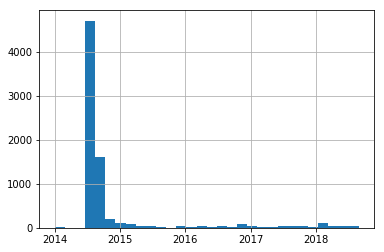

In [129]:
frl.groupby('link').timestamp.min().sort_values(ascending=False).hist(bins=30)

In [130]:
frl.groupby(['lang', 'link']).timestamp.min()t.sort_values(by=['lang', 'timestamp'], ascending=False)

TypeError: sort_values() got an unexpected keyword argument 'by'